In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [2]:
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9012,NaN,NaN,NaN,1.0,NaN,If I was the GM of the Milwaukee Brewers for a...,NaN,NaN,NaN,NaN,NaN
9013,NaN,NaN,1.0,NaN,1.0,"ok, but why are you saying this here? who the ...",NaN,NaN,NaN,NaN,NaN
9014,NaN,NaN,NaN,1.0,NaN,Through The Fire And Flames found in the Ranke...,NaN,NaN,NaN,NaN,NaN
9015,NaN,NaN,NaN,1.0,NaN,Love the fma view,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(9017, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   racism       8992 non-null   float64
 1   sexism       8908 non-null   float64
 2   other        8910 non-null   float64
 3   none         8916 non-null   float64
 4   label        9004 non-null   float64
 5   tweet        9017 non-null   object 
 6   category     8903 non-null   object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 775.0+ KB


In [5]:
df['racism'].fillna(0, inplace = True)
df['racism'].isnull().sum()

0

In [6]:
df['sexism'].fillna(0, inplace = True)
df['sexism'].isnull().sum()

0

In [7]:
df['other'].fillna(0, inplace = True)
df['other'].isnull().sum()

0

In [8]:
df['none'].fillna(0, inplace = True)
df['none'].isnull().sum()

0

In [9]:
df['category'].isnull().sum()

114

In [10]:
for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'none'] == 1:
        df.at[index_label, 'label'] = 0

        df.at[index_label, 'category'] = 'none' 
    
      
    elif df.at[index_label, 'racism'] == 1:
        
        df.at[index_label, 'label'] = 1        
        df.at[index_label, 'category'] = 'racism'
        
          
    elif df.at[index_label, 'sexism'] == 1:
        
        df.at[index_label, 'label'] = 2      

        df.at[index_label, 'category'] = 'sexism'
          
    elif df.at[index_label, 'other'] == 1:
        
        df.at[index_label, 'label'] = 3        

        df.at[index_label, 'category'] = 'other'
        

In [11]:
df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9012,0.0,0.0,0.0,1.0,0.0,If I was the GM of the Milwaukee Brewers for a...,none,NaN,NaN,NaN,NaN
9013,0.0,0.0,1.0,0.0,3.0,"ok, but why are you saying this here? who the ...",other,NaN,NaN,NaN,NaN
9014,0.0,0.0,0.0,1.0,0.0,Through The Fire And Flames found in the Ranke...,none,NaN,NaN,NaN,NaN
9015,0.0,0.0,0.0,1.0,0.0,Love the fma view,none,NaN,NaN,NaN,NaN


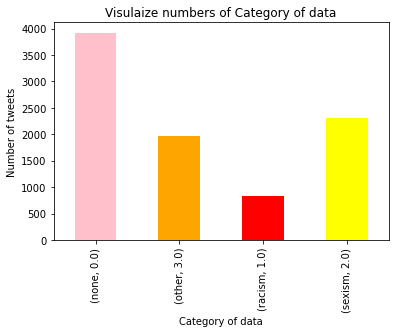

In [12]:
df.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel('Number of tweets')
plt.title("Visulaize numbers of Category of data")
plt.savefig('D:\Programming\BE PROJECT\datasets\\foo.png')
plt.show()

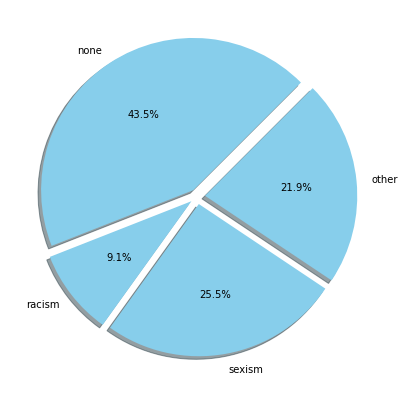

In [13]:
fig = plt.figure(figsize = (7,7))
colors = ["skyblue"]
none = df[df['label'] == 0 ]
racism = df[df['label'] == 1 ]
sexism = df[df['label'] == 2]
other = df[df['label'] == 3]
count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode= (0.05, 0.05, 0.05, 0.05)
             )

In [73]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, category, color = 'black'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    
    if category == 'none' :
        
        print('Non Bullying tweets: ')
    
    elif category == 'other':
        
        print('Hate speech realted tweets: ')
    
    else:
        
        print(category + " " + "related tweets : ")
    
    plt.show()



Non Bullying tweets: 


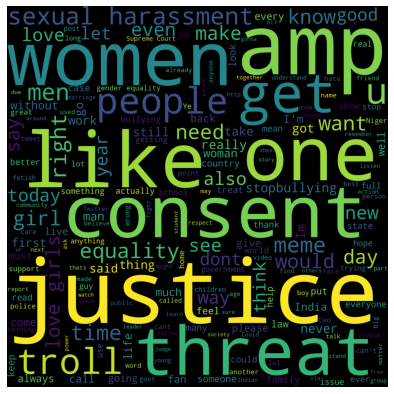

In [16]:
wordcloud_draw(none, 'none')

racism related tweets : 


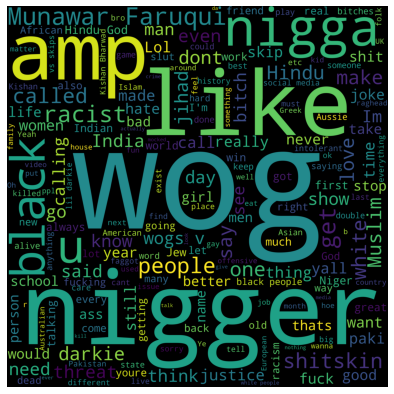

In [17]:
wordcloud_draw(racism, 'racism')

sexism related tweets : 


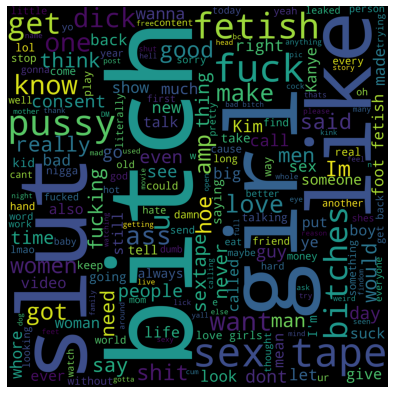

In [18]:
wordcloud_draw(sexism, 'sexism')

Hate speech realted tweets: 


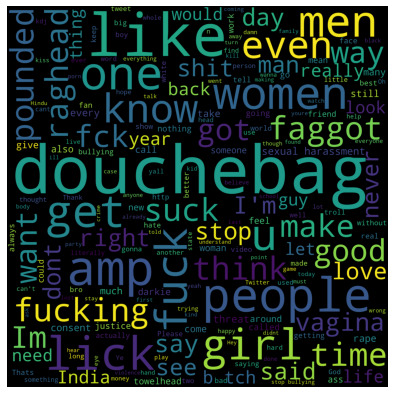

In [19]:
wordcloud_draw(other, 'other')

In [14]:
X = df['tweet']
y = df['category']
print(len(X))
print(len(y))

9017
9017


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
X = np.array(df.iloc[:,0].values)
y = np.array(df.category.values)
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(df.tweet).toarray()
print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (9017, 5000)
y.shape =  (9017,)


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True)
print(len(x_train))
print(len(x_test))

6762
2255


In [17]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
y_train

array(['none', 'other', 'sexism', ..., 'sexism', 'none', 'none'],
      dtype=object)

In [20]:
y_test

array(['none', 'none', 'none', ..., 'sexism', 'sexism', 'sexism'],
      dtype=object)

In [21]:
#create list of model and accuracy dicts
perform_list = [ ]

In [22]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy')

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0, fit_prior=True)

    elif model_name == 'Support Vector Classifer':

        mdl = SVC()

    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
    

    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: {accuracy} %')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [23]:
begin = time.time()
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Multinomial Naive Bayes: 72.73 %
Precision : 0.7272727272727273
Recall : 0.7272727272727273
F1-score : 0.7272727272727273
Time taken:  4.2103681564331055


In [ ]:
begin = time.time()
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

In [182]:
begin = time.time()
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

KeyboardInterrupt: 

In [31]:
begin = time.time()
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
end = time.time()

print("Time taken: ",end - begin)

Test Accuracy Score of Basic Decision Tree Classifier: 71.84 %
Precision : 0.7183794466403162
Recall : 0.7183794466403162
F1-score : 0.7183794466403162
Time taken:  192.636403799057


In [24]:
begin = time.time()
run_model('Random Forest', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Random Forest: 80.84 %
Precision : 0.8084257206208426
Recall : 0.8084257206208426
F1-score : 0.8084257206208426
Time taken:  194.66029453277588


In [25]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Multinomial Naive Bayes,72.73,0.73,0.73,0.73
1,Random Forest,80.84,0.81,0.81,0.81


In [26]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value, "%")


The best accuracy of model is 80.84 %


In [27]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' ).fit(x_train, y_train)
classifier
# y_pred = classifier.predict(x_test)
# y_pred

RandomForestClassifier(criterion='entropy')

In [42]:
# save the model to disk

import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'

vectorizer = joblib.dump(cv, vectorizer_filename) # save vectorizer
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer


model = joblib.dump(classifier, model_filename) # save model
loaded_model = joblib.load(model_filename) # load model


RandomForestClassifier(criterion='entropy')

In [76]:
# Data fetching
#!pip3 install git+https://github.com/Museum-Barberini/twint.git@fix/RefreshTokenException#egg=twint
import nest_asyncio
nest_asyncio.apply()
import twint, time

try:

    c = twint.Config()
    
#     c.Username = input("Enter the username : ")

    c.Search = input("Enter the topic you want to search : ")

    c.Lang = "en"


#     c.Near = "India"
    
    c.Limit = 100

    c.Min_Likes = 100

    c.Store_csv = True       # store tweets in a csv file


    c.Output = "D:/Programming/BE PROJECT/test_tweets/" +c.Search + ".csv"      # path to csv file

    twint.run.Search(c)

except Exception as e:
    print(e)
  

Enter the topic you want to search : srk lata mangeshkar
1492174088869228556 2022-02-11 22:00:00 +0530 <QuintFactCheck> #WebQoof | A short video showing @iamsrk paying his respects by offering 'dua' (prayer) at the late Lata Mangeshkar's funeral was widely shared, falsely claiming that Khan spat at the her mortal remains. Read here.   https://t.co/Iz73Y5xZt6
1492051522816983059 2022-02-11 13:52:58 +0530 <iam_raheman_srk> RT @Kash38958629: RT @BOWorldwide: Amid #LataMangeshkar funeral controversy, #SRK’s old video on how his family fought in India’s freedom struggle goes viral  #ShahRukhKhan @iamsrk @SRKCHENNAIFC @SRKUniverse @TeamSRKWarriors   https://t.co/UUQ7WTmbeY
1492051514248019985 2022-02-11 13:52:56 +0530 <iam_raheman_srk> RT @IJagirdaar: RT @BOWorldwide: Amid #LataMangeshkar funeral controversy, #SRK’s old video on how his family fought in India’s freedom struggle goes viral  #ShahRukhKhan @iamsrk @SRKCHENNAIFC @SRKUniverse @TeamSRKWarriors   https://t.co/UUQ7WTmbeY
14920290690

1491330334084198400 2022-02-09 14:07:13 +0530 <ArmanSi67713696> #Indianflag #ShahRukhKhan #LataMangeshkar Mai itna to janta hu ki agar dua padh kar .... Fuka jaye to ...'Shaitan'  ko hi takleef hoti hai @iamsrk  https://t.co/kuQIuKBEUG
1491327026728701955 2022-02-09 13:54:05 +0530 <MaitreyeeKarma3> @pooja_dadlani  you are one hell of manager....all I see is @iamsrk 's awesome posts in all social media platforms after the Lata Mangeshkar controversy  👌👌👌👌👌
1491325092328263683 2022-02-09 13:46:24 +0530 <kamaalrkhan> Many people are asking me to make a video about SRK’s prayer for Lata Mangeshkar ji and agenda of BJP Bhakts. please note if I will make a video, then I will say only truth, and if I will say truth, then Srk and his fans will get angry on me. So better I should keep quite!
1491324989039321088 2022-02-09 13:45:59 +0530 <MrsRakhiSawant> #ShahRukhKhan is the king. ❤️ Stop doing dirty politics in his name. RIP #LataMangeshkar ji. #LataDidi 🌺  Watch this video and share it to maxi

1491081491765673985 2022-02-08 21:38:25 +0530 <MEHEBUBSIKDAR1> This is how we live together in India ... #SRK #SRKians #India #Bollywood #LataMangeshkar #LataDidi  https://t.co/FKAzfTISI4
1491074233438720001 2022-02-08 21:09:34 +0530 <COD_eMart> Best Picture On Internet 🖤  #SRK  #LataMangeshkar #LataMangeshkar #LataDidi #LataMangeshkarhealth  https://t.co/0IZ2TttHuR
1491068983457759232 2022-02-08 20:48:43 +0530 <SS_Aryaveer> #SRK #ShahRukhKhan #LataMangeshkar  https://t.co/pb1AL0iYC5
1491065531528478721 2022-02-08 20:35:00 +0530 <laxmi_raman> तुम नफरत को ताक़ते रह जाओगे, वो आयेगा और मोहब्बत तकसीम कर जाएगा ।  #SRK #LataMangeshkar  https://t.co/l15OLrdxOV
1491065324741197840 2022-02-08 20:34:10 +0530 <Nationalist_pra> @TeamSRKWarriors @iamsrk @RedChilliesEnt @khyatimadaan @pooja_dadlani @BilalS158 @KarunaBadwal @iamsrkclub Islamic law k hisab se jo Islam aur Paigambar ko nahi manta , Uske k liye Tajiya, Kalma aur aayat nahi padhte,  @iamsrk You are doing Kufra  which is prohibited in Isl

In [77]:
# Data import
import pandas as pd

df1 = pd.read_csv( "D:/Programming/BE PROJECT/test_tweets/" + c.Search + ".csv", error_bad_lines= False)

print(len(df1['tweet']))

df1['tweet']


229


0      RT @Kash38958629: RT @BOWorldwide: Amid #LataM...
1      RT @IJagirdaar: RT @BOWorldwide: Amid #LataMan...
2      @MrSinha_ @HabibKhanT Bhai tu rehne de, you we...
3      SRK Lata Mangeshkar ! Shaharukh Khan Twitter T...
4      Not a fan of @iamsrk But, there is a section o...
                             ...                        
224    There is some news that a fucker named #AryanS...
225    そう‼️コレが正しい  #SRK made a dua at Lata Mangeshkar...
226    ラタ・マンゲシュカルの遺体にSRK 様が唾をかけたとヒンドゥー至上主義が批判しているとの記事...
227     https://t.co/jWpMm58keO @iamsrk @mangeshkarla...
228    নেটপাড়া এখন দুই ভাগে বিভক্ত। এক দল বলছে, শাহর...
Name: tweet, Length: 229, dtype: object

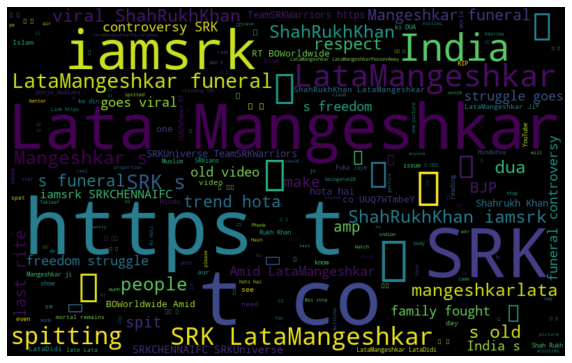

In [78]:
# world cloud to see frequent words in tweets.

all_words = ' '.join([text for text in df1['tweet']])

from wordcloud import WordCloud

import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()


In [79]:
# preprocessing and removing  non english tweets

import preprocessor as p

from langdetect import detect 

def preprocess(input_txt):
    
    try:
        if detect(input_txt) == 'en' and (len(p.clean(input_txt)) > 3):
            return p.clean(input_txt)

    except Exception as e:
        print(e)

In [80]:
# clean the tweets and remove non-english tweets

df1['tweet'] = np.vectorize(preprocess)(df1['tweet'].astype(str))

In [81]:
print(df1['tweet'].head())
df1['tweet'].replace('None', np.nan, inplace=True)
print("\nLength before deleting: ", len(df1))
df1.dropna(subset=['tweet'], how ='all', inplace = True)
df1 = df1.reset_index()
print("Length after deleting: ", len(df1))
print("Empty values: ", df1.tweet.isnull().sum())


0    : RT : Amid funeral controversy, old video on ...
1    : RT : Amid funeral controversy, old video on ...
2                                                 None
3    SRK Lata Mangeshkar ! Shaharukh Khan Twitter T...
4    Not a fan of But, there is a section of politi...
Name: tweet, dtype: object

Length before deleting:  229
Length after deleting:  153
Empty values:  0


In [82]:
df1['tweet'].head()

0    : RT : Amid funeral controversy, old video on ...
1    : RT : Amid funeral controversy, old video on ...
2    SRK Lata Mangeshkar ! Shaharukh Khan Twitter T...
3    Not a fan of But, there is a section of politi...
4    Popular actor, Anindya Chatterjee, denounced t...
Name: tweet, dtype: object

In [114]:
y_pred1 = cv.transform(df1['tweet'][:10].values)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   

# for i in range(2):
# #     print(list(classifier.predict(y_pred1[i]))[0])
#     result.append(classifier.predict(y_pred1[i]))

# for i in range(2):

#     if result[i] == "none":
#         pass
        
# #         print("Non Bullying tweet")

#     elif result[i] == "racism":
#         pass

# #         print("Racism tweet")

#     elif result[i] == "sexism":
#         pass

# #         print("Sexism tweet")

#     elif result[i] == "other":
#         pass

# #         print("Other hate speech tweet")




[1]  : RT : Amid funeral controversy, old video on how his family fought in Indias freedom struggle goes viral  [none]

[2]  : RT : Amid funeral controversy, old video on how his family fought in Indias freedom struggle goes viral  [none]

[3]  Bhai tu rehne de, you were spreading likes about SRK at Lata Mangeshkars funeral.  [none]

[4]  SRK Lata Mangeshkar ! Shaharukh Khan Twitter Trolls | Viral video !  [none]

[5]  Not a fan of But, there is a section of politicians who have promised to blow every issue out of proportion to harm the nation. They have no knowledge that Muslims blow air after dua.'He is NOT SPITTING on anyone' ! was like his mother.  [none]

[6]  Popular actor, Anindya Chatterjee, denounced those critical of SRKs gesture at Lata Mangeshkars funeral saying, You see Shah Rukh Khan. I see the tallest statue of India and the statue of unity in one picture. People are simply blowing this out of proportion .  [none]

[7]  Watching one another Time What a beautiful Movie H

In [89]:
# load the model from disk
loaded_model = joblib.load(filename)
tweets = cv.transform(df1['tweet'][:20].values)
result = loaded_model.predict(tweets)
for i in range(len(result)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + result[i] + ']')




[1]  : RT : Amid funeral controversy, old video on how his family fought in Indias freedom struggle goes viral  [none]

[2]  : RT : Amid funeral controversy, old video on how his family fought in Indias freedom struggle goes viral  [none]

[3]  SRK Lata Mangeshkar ! Shaharukh Khan Twitter Trolls | Viral video !  [none]

[4]  Not a fan of But, there is a section of politicians who have promised to blow every issue out of proportion to harm the nation. They have no knowledge that Muslims blow air after dua.'He is NOT SPITTING on anyone' ! was like his mother.  [none]

[5]  Popular actor, Anindya Chatterjee, denounced those critical of SRKs gesture at Lata Mangeshkars funeral saying, You see Shah Rukh Khan. I see the tallest statue of India and the statue of unity in one picture. People are simply blowing this out of proportion .  [none]

[6]  Watching one another Time What a beautiful Movie Handsome , Tooo Priteee ..Beautiful Locationso Colourful melodious Songs sung Lata Mangeshkar Ji,